In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pingouin

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sqlalchemy import create_engine
import sqlite3

pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings("ignore")

In [3]:
coh = pd.read_csv("C:\\Users\\ASUS-X515EP\\Downloads\\marketing_vova.csv", parse_dates=['date_reg'])
mark_act = pd.read_csv("C:\\Users\\ASUS-X515EP\\Downloads\\marketing_act_vova.csv", parse_dates=['date_reg'])
df = mark_act.merge(coh,
                   on=['date_reg', 'id_network', 'age', 'country', 'device', 'gender'],
                   how='left').dropna()

In [4]:
df.isna().sum()

date_reg                   0
id_network                 0
age                        0
country                    0
device                     0
gender                     0
lt                         0
cnt_logins                 0
fin_amount                 0
credits_amount             0
credits_spend_service_1    0
credits_spend_service_2    0
credits_spend_service_3    0
credits_spend_service_4    0
costs                      0
regs                       0
dtype: int64

In [4]:
df.sample(5)

,date_reg,id_network,age,country,device,gender,lt,cnt_logins,fin_amount,credits_amount,credits_spend_service_1,credits_spend_service_2,credits_spend_service_3,credits_spend_service_4,costs,regs
490665,2023-10-02,6,45-,United States,desktop,male,86,1,0.00,0,0,0,0,0,275.53,78
105,2023-07-16,9,45+,"UK, GB, CA, NZ, AU",desktop,male,66,2,0.00,0,0,0,0,0,324.93,51
1651879,2024-03-12,5,45-,"UK, GB, CA, NZ, AU",mobile,male,68,3,25.92,67,0,69,0,0,1208.84,136
236402,2023-08-24,4,45+,United States,mobile,male,72,13,144.44,592,285,315,15,0,15380.80,508
1689455,2024-03-18,0,45+,United States,desktop,male,30,11,42.49,187,0,159,0,0,1201.42,133


In [5]:
df.describe()

,date_reg,id_network,lt,cnt_logins,fin_amount,credits_amount,credits_spend_service_1,credits_spend_service_2,credits_spend_service_3,credits_spend_service_4,costs,regs
count,2167590,2167590.00,2167590.00,2167590.00,2167590.00,2167590.00,2167590.00,2167590.00,2167590.00,2167590.00,2167590.00,2167590.00
mean,2024-01-01 05:37:26.575780864,5.39,35.56,11.00,25.89,148.00,23.14,39.72,14.88,18.19,2010.37,278.59
min,2023-07-16 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2023-10-13 00:00:00,3.00,13.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,266.29,42.00
50%,2024-01-02 00:00:00,6.00,31.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,794.51,107.00
75%,2024-03-21 00:00:00,8.00,56.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,2183.62,319.00
max,2024-07-13 00:00:00,9.00,90.00,5250.00,20211.05,117600.00,36765.00,6489.00,28582.00,132613.00,30506.22,5528.00
std,NaN,2.77,26.03,65.11,133.25,829.73,227.96,148.09,94.65,392.30,3179.72,468.30


In [328]:
# утворюю сегменти
df['segment']=df['country'].astype('str')+'_'+df['device'].astype('str')+'_'+df['gender'].astype('str')+'_'+df['age'].astype('str')
# Отримую усі дати активності
df['act_date'] =  df.apply(lambda row: row['date_reg'] + pd.Timedelta(days=row['lt']), axis=1)
df.sample(5)

,date_reg,id_network,age,country,device,gender,lt,cnt_logins,fin_amount,credits_amount,credits_spend_service_1,credits_spend_service_2,credits_spend_service_3,credits_spend_service_4,costs,regs,segment,act_date,CPR
1407621,2024-02-08,8,45+,"UK, GB, CA, NZ, AU",mobile,male,35,13,0.00,0,0,6,0,0,4537.09,538,"UK, GB, CA, NZ, AU_mobile_male_45+",2024-03-14,8.43
1497808,2024-02-20,8,45-,Other,mobile,male,63,4,0.00,0,0,0,0,0,697.81,397,Other_mobile_male_45-,2024-04-23,1.76
821900,2023-11-16,5,45-,Other,mobile,male,51,1,0.00,0,0,0,0,0,136.01,52,Other_mobile_male_45-,2024-01-06,2.62
541485,2023-10-09,2,45-,United States,mobile,male,39,2,0.00,0,0,0,0,0,1446.22,245,United States_mobile_male_45-,2023-11-17,5.90
1219919,2024-01-13,2,45+,Other,desktop,male,6,1,0.00,0,0,0,0,0,19.97,3,Other_desktop_male_45+,2024-01-19,6.66


In [7]:
# змінюю тип даних
df['id_network'] = df['id_network'].astype('category')
df['age'] = df['age'].astype('category')
df['country'] = df['country'].astype('category')
df['device'] = df['device'].astype('category')
df['gender'] = df['gender'].astype('category')
df['lt'] = df['lt'].astype('int16')
df['cnt_logins'] = df['cnt_logins'].astype('int16')
df['fin_amount'] = df['fin_amount'].astype('float32')
df['credits_amount'] = df['credits_amount'].astype('int32')
df['credits_spend_service_1'] = df['credits_spend_service_1'].astype('int32')
df['credits_spend_service_2'] = df['credits_spend_service_2'].astype('int32')
df['credits_spend_service_3'] = df['credits_spend_service_3'].astype('int16')
df['credits_spend_service_4'] = df['credits_spend_service_4'].astype('int32')
df['costs'] = df['costs'].astype('float32')
df['regs'] = df['regs'].astype('int16')
df['segment'] = df['segment'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2167590 entries, 0 to 2285842
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   date_reg                 datetime64[ns]
 1   id_network               category      
 2   age                      category      
 3   country                  category      
 4   device                   category      
 5   gender                   category      
 6   lt                       int16         
 7   cnt_logins               int16         
 8   fin_amount               float32       
 9   credits_amount           int32         
 10  credits_spend_service_1  int32         
 11  credits_spend_service_2  int32         
 12  credits_spend_service_3  int16         
 13  credits_spend_service_4  int32         
 14  costs                    float32       
 15  regs                     int16         
 16  segment                  category      
 17  act_date                 datetim

<Axes: >

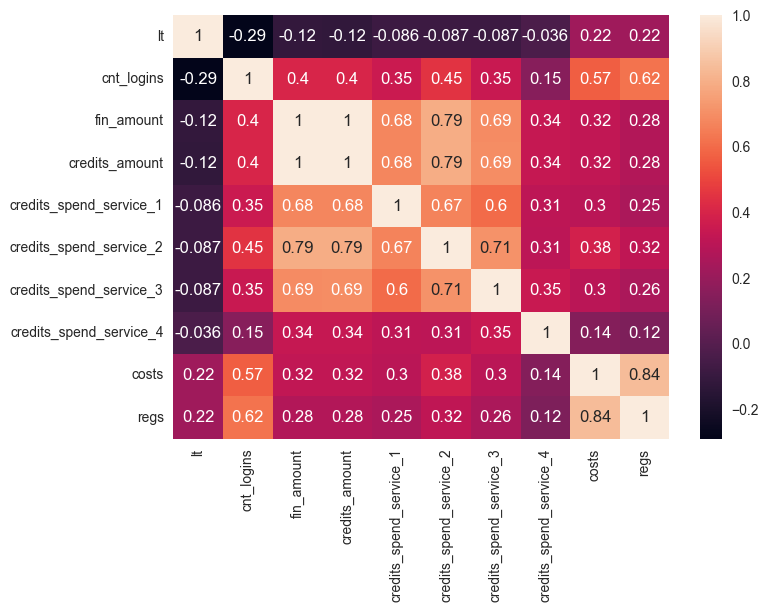

In [9]:
corr = df.select_dtypes(include=['number']).corr(method='spearman')
sns.heatmap(corr, annot=True)

## Робота з метрикам

In [10]:
# Cost per regestration
df['CPR'] = df['costs'] / df['regs']
df['CPR'] = df['CPR'].astype('float32')

In [11]:
# Щоденні когорти для різних каналів
df_c = df.copy()
df_c = df_c.drop(['age', 'country', 'device', 'gender', 'segment'], axis=1)

df_c = df_c.groupby(['id_network', 'date_reg', 'lt'], as_index=False, observed=True).agg(
                                                                                fin_amount=('fin_amount', 'sum'),
                                                                                cnt_logins=('cnt_logins', 'sum')
                                                                                )

df_r = coh.groupby(['date_reg', 'id_network'], as_index=False).regs.sum()
df_c = df_c.merge(df_r, how='left', on=['date_reg', 'id_network'])

df_cc = coh.groupby(['date_reg', 'id_network'], as_index=False).costs.sum()
df_c = df_c.merge(df_cc, how='left', on=['date_reg', 'id_network'])

df_c[['cs_rev_ch']] = (df_c.sort_values(['id_network', 'date_reg', 'lt'])
                                        .groupby(['id_network', 'date_reg'])[['fin_amount']].cumsum())      

# ксількість активних фінансових днів, останній активний фінансовий день

# Окупність інвтестицій      
df_c['ROAS_ch'] = df_c['cs_rev_ch'] / df_c['costs']            
# Скільки грошей приносять юзери в когорті
df_c['ARPU_ch'] = df_c['cs_rev_ch'] / df_c['regs'] 
# Кількість активних фінансових днів
df_c['act_fin_d'] = np.where(df_c['fin_amount']>0, 1, 0)
# Останній активний lifetime у фінансовому аспекті
df_c['last_lt'] = np.where(df_c['fin_amount']>0, 1, 0)
df_c.sample(5)

,id_network,date_reg,lt,fin_amount,cnt_logins,regs,costs,cs_rev_ch,ROAS_ch,ARPU_ch,act_fin_d,last_lt
122905,4,2023-11-24,54,116.31,12,1082,25287.60,11659.09,0.46,10.78,1,1
143679,5,2023-08-25,80,254.98,10,2042,23625.91,19520.83,0.83,9.56,1,1
197782,6,2024-06-24,4,36.52,59,1412,4321.72,800.83,0.19,0.57,1,1
2231,0,2023-08-10,87,0.00,2,79,981.69,537.83,0.55,6.81,0,0
221768,7,2024-04-02,29,169.99,88,7841,19731.88,7649.76,0.39,0.98,1,1


In [ ]:
df_c.to_csv('C:\\Users\\ASUS-X515EP\\Desktop\\Data\\Projects\\Cohort Marketing\\df_c.csv')

In [12]:
# Щоденні когорти для різних сегментів в каналах
df_a = df.copy()
df_a = df_a.drop(['age', 'country', 'device', 'gender'], axis=1)

df_a[['cs_rev_seg', 'cs_logs_seg']] = (df_a.sort_values(['id_network', 'segment', 'date_reg', 'lt'])
                                        .groupby(['id_network', 'segment', 'date_reg'])
                                        [['fin_amount', 'cnt_logins']].cumsum())

# Окупність інвестицій
df_a['ROAS_seg'] = df_a['cs_rev_seg'] / df_a['costs']
# Скільки грошей приносять юзери в когорті
df_a['ARPU_seg'] = df_a['cs_rev_seg'] / df_a['regs']
# вимірює, скільки коштує нам постійна активність користувачів у каналі
df_a['CPLog_seg'] = df_a['costs'] / df_a['cs_logs_seg']
df_a.sample(5)

,date_reg,id_network,lt,cnt_logins,fin_amount,credits_amount,credits_spend_service_1,credits_spend_service_2,credits_spend_service_3,credits_spend_service_4,costs,regs,segment,act_date,CPR,cs_rev_seg,cs_logs_seg,ROAS_seg,ARPU_seg,CPLog_seg
594507,2023-10-16,6,83,1,0.00,0,0,18,0,0,98.19,40,United States_desktop_male_45+,2024-01-07,2.45,5215.19,176,53.11,130.38,0.56
1765575,2024-03-28,1,43,1,0.00,0,0,0,0,0,50.90,21,Other_mobile_male_45+,2024-05-10,2.42,0.00,50,0.00,0.00,1.02
2285805,2024-07-13,4,0,95,33.98,450,27,267,120,0,836.00,96,United States_desktop_male_45+,2024-07-13,8.71,33.98,95,0.04,0.35,8.80
236333,2023-08-24,4,3,64,1345.41,9037,3045,2263,1072,1048,15380.80,508,United States_mobile_male_45+,2023-08-27,30.28,7793.65,760,0.51,15.34,20.24
887143,2023-11-26,6,32,3,0.00,0,0,0,0,0,404.22,137,"UK, GB, CA, NZ, AU_mobile_male_45+",2023-12-28,2.95,16.45,341,0.04,0.12,1.19


In [ ]:
df_a.to_csv('C:\\Users\\ASUS-X515EP\\Desktop\\Data\\Projects\\Cohort Marketing\\df_a.csv')

## Реструктуризація датафрейму

### Перший етап

In [13]:
# Датафрейм для реструктуризації на основі прибутковості
df_r1 = df_a.groupby(['date_reg', 'id_network', 'segment'], as_index=False)[['costs', 'fin_amount']].agg(['mean', 'sum'])

df_r1.columns = ['_'.join(col).strip() for col in df_r1.columns.values]
df_r1 = df_r1.drop(['costs_sum', 'fin_amount_mean'], axis=1)

df_rm = df_r1.groupby(['id_network_', 'segment_'], as_index=False).agg(
                                                revenue=('fin_amount_sum', 'sum'),
                                                costs=('costs_mean', 'sum')).rename(columns=({'id_network_':'id_network',
                                                                                              'segment_':'segment'}))
df_rm['ROAS'] = df_rm['revenue'] / df_rm['costs']
df_rm.sample(5)

,id_network,segment,revenue,costs,ROAS
91,3,United States_desktop_male_45-,32098.86,106610.57,0.30
98,4,Other_desktop_male_45+,238607.20,180870.80,1.32
53,2,Other_mobile_female_45-,2297.24,13218.39,0.17
5,0,Other_mobile_female_45-,0.00,449.40,0.00
229,9,"UK, GB, CA, NZ, AU_mobile_female_45-",131441.06,213295.62,0.62


In [14]:
# датафрейм, який буде використовуватись як орієнтир при мастабуванні, щоб зберегти пропорції витрат серед каналів та сегментів
df_s = df_rm[(df_rm['id_network']==0) | (df_rm['id_network']==1) |
     (df_rm['id_network']==3) & (df_rm['ROAS']>0.9) |
     (df_rm['id_network']==4) & (df_rm['ROAS']>0.75) |
     (df_rm['id_network']==5) & (df_rm['ROAS']>0.75) |
     (df_rm['id_network']==6) & (df_rm['ROAS']>0.8) |
     (df_rm['id_network']==7) & (df_rm['ROAS']>0.9) |
     (df_rm['id_network']==8) & (df_rm['ROAS']>1) |
     (df_rm['id_network']==9) & (df_rm['ROAS']>0.95)]
df_s['id_network'] = df_s['id_network'].cat.remove_categories(removals=[2])
df_c8 = df_rm[(df_rm['id_network']==8) & (df_rm['ROAS']<1)]
df_c8['costs'] = df_c8['costs'] * 0.5
df_s = pd.concat([df_s, df_c8], axis=0).sort_values('id_network')
df_s

,id_network,segment,revenue,costs,ROAS
0,0,Other_desktop_female_45+,0.00,96.35,0.00
23,0,United States_mobile_male_45-,70950.20,203646.94,0.35
22,0,United States_mobile_male_45+,1015463.56,718391.06,1.41
21,0,United States_mobile_female_45-,2275.93,22476.26,0.10
20,0,United States_mobile_female_45+,9141.06,38387.52,0.24
...,...,...,...,...,...
224,9,"UK, GB, CA, NZ, AU_desktop_female_45+",34227.07,24909.05,1.37
222,9,Other_mobile_male_45+,594538.50,352781.06,1.69
220,9,Other_mobile_female_45+,196115.41,106063.59,1.85
216,9,Other_desktop_female_45+,17964.08,4910.52,3.66


In [15]:
df_a.fin_amount.sum() - df_s.revenue.sum()

11452460.0

In [16]:
# Суму, яку треба перерозподілити
total_budget_to_redistribute = df_rm.costs.sum() - df_s.costs.sum()

# Канали, які треба масштабувати: 0, 1, 8.
df_sc = df_s[(df_s['id_network']==0) | (df_s['id_network']==1) | (df_s['id_network']==8)]
# Викидаю ці ж канали, оскільки потім додам їх з перерозподіленими сумами
df_s = df_s[~((df_s['id_network']==0) | (df_s['id_network']==1) | (df_s['id_network']==8))]
df_s['redistributed_budget'] = df_s['costs']

# Сумарний бюджет на прибуткові канали та сегменти
total_profitable_budget = df_sc['costs'].sum()

# Перерозподіл бюджета на канали (які треба масштабувати) та сегменти пропорційно їх поточному бюджету 
df_sc['redistributed_budget'] = df_sc['costs'] + (df_sc['costs'] / total_profitable_budget) * total_budget_to_redistribute

# Ою'єдную в новий датафрейм
df_s = pd.concat([df_s, df_sc], axis=0)
df_s

,id_network,segment,revenue,costs,ROAS,redistributed_budget
82,3,"UK, GB, CA, NZ, AU_desktop_male_45+",150098.83,124163.13,1.21,124163.13
84,3,"UK, GB, CA, NZ, AU_mobile_female_45+",162460.27,84889.94,1.91,84889.94
86,3,"UK, GB, CA, NZ, AU_mobile_male_45+",718866.31,626550.00,1.15,626550.00
90,3,United States_desktop_male_45+,353771.00,252735.31,1.40,252735.31
92,3,United States_mobile_female_45+,159712.05,176165.25,0.91,176165.25
...,...,...,...,...,...,...
206,8,"UK, GB, CA, NZ, AU_mobile_male_45+",1941863.00,1663110.38,1.17,4324037.00
208,8,United States_desktop_female_45+,50724.24,31229.91,1.62,81196.83
210,8,United States_desktop_male_45+,1039257.38,482863.94,2.15,1255431.75
212,8,United States_mobile_female_45+,499452.97,469103.78,1.06,1219655.75


In [17]:
# Sanity check
print(f'Сумарний бюджет до перерозподілу: {coh.costs.sum():.0f}')
print(f'Сумарний бюджет після перерозподілу: {df_s.redistributed_budget.sum():.0f}')
# Як бачимо, різниця зовсім незнанча та вимірюється в тисячах, тому картина виглядає адекватно й кошти ребалансовані правильно

Сумарний бюджет до перерозподілу: 62635959
Сумарний бюджет після перерозподілу: 62634268


### Другий етап

#### Пропорція нових витрат до старих

In [19]:
df_rm.groupby('id_network').costs.sum()

id_network
0    1364648.50
1    2394651.75
2    3495033.00
3    5029324.50
4   10725850.00
5    8590785.00
6    2199281.00
7    5985135.50
8   11714752.00
9   11134810.00
Name: costs, dtype: float32

In [20]:
df_s.groupby('id_network').redistributed_budget.sum()

id_network
0    3548045.25
1    6226023.00
3    2689076.75
4    7143565.50
5    6718281.00
6     944283.00
7     941915.56
8   26530010.00
9    7893069.50
Name: redistributed_budget, dtype: float32

In [18]:
# Як збільшились або зменшттсь пропорції фінансових вкладів після ребалансування
df_rm = df_rm[df_rm['id_network']!=2]
df_rm['id_network'] = df_rm['id_network'].cat.remove_unused_categories()

df_prop = df_s.groupby('id_network').redistributed_budget.sum() / df_rm.groupby('id_network').costs.sum()

In [19]:
# Датафрейм для початкового прогнозу
df_f1 = df_a[['date_reg', 'id_network', 'lt', 'segment', 'costs', 'ROAS_seg']]
df_f1.sample(5)

,date_reg,id_network,lt,segment,costs,ROAS_seg
475525,2023-09-30,6,84,Other_mobile_male_45+,192.70,7.30
373713,2023-09-15,8,4,"UK, GB, CA, NZ, AU_mobile_male_45-",1780.34,0.02
2069516,2024-05-12,8,32,United States_desktop_male_45+,677.85,1.55
1582243,2024-03-03,8,0,Other_desktop_male_45-,43.64,0.06
1595718,2024-03-05,0,47,United States_mobile_female_45+,250.67,0.00


#### Реструктуризація датафрейму для кінцевого прогнозу

In [20]:
# Функція для sanity check витрат
def sanity_check(df, chann):
    df_ = df.groupby(['date_reg', 'id_network', 'segment'], as_index=False)['costs'].mean()

    df__ = df_.groupby(['id_network', 'segment'], as_index=False).agg(costs=('costs', 'sum'))
    
    number = df_s[df_s['id_network']==chann].groupby('id_network').redistributed_budget.sum()[chann]
    
    return ((df__.costs.sum()>=number-1000)
                & (df__.costs.sum()<=number+1000))

# Функція отримання прибуткових сегментів для оптимізації каналів
def segments(chann):
    return df_s[df_s['id_network']==chann].segment.unique().to_list()

In [21]:
# Для каналів, які треба масштабувати - збільшую їх значення.
# Для каналів, які треба оптимізувати - обираю прибуткові та перспективні сегменти, які обрані були на основі аналізу в Tableau.
# Та видаляю пагані сегменти
# Потім це все об'єдную в загальний датафрейм.
df_final = pd.DataFrame()
for i in range(10):
    df_c = pd.DataFrame()
    if i in [0, 1]:
        print(f'Робота з каналом №{i}')
        df_c = df_f1[df_f1['id_network']==i]
        df_c['costs'] = df_c['costs'] * df_prop[i]
        print('Чи відповідає сумма витрат в новому датафрейму необхідному числу?', sanity_check(df_c, i))
    elif i == 2:
        pass
    elif i in [8]:
        print(f'Робота з каналом №{i}')
        df_c = df_f1[(df_f1['id_network']==i) & df_f1.segment.isin(segments(i))]
        df_c['costs'] = df_c['costs'] * df_prop[i]
        print('Чи відповідає сумма витрат в новому датафрейму необхідному числу?', sanity_check(df_c, i))
    elif i in [3, 4, 5, 6, 7, 9]:
        print(f'Робота з каналом №{i}')
        df_c = df_f1[(df_f1['id_network']==i) & df_f1.segment.isin(segments(i))]
        df_c['costs'] = df_c['costs']
        print('Чи відповідає сумма витрат в новому датафрейму необхідному числу?', sanity_check(df_c, i))
    
    df_final = pd.concat([df_final, df_c])
df_final

Робота з каналом №0
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №1
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №3
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №4
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №5
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №6
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №7
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №8
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True
Робота з каналом №9
Чи відповідає сумма витрат в новому датафрейму необхідному числу? True


,date_reg,id_network,lt,segment,costs,ROAS_seg
604,2023-07-16,0,0,United States_desktop_male_45+,193.85,2.54
605,2023-07-16,0,1,United States_desktop_male_45+,193.85,3.11
606,2023-07-16,0,2,United States_desktop_male_45+,193.85,3.11
607,2023-07-16,0,3,United States_desktop_male_45+,193.85,4.25
608,2023-07-16,0,4,United States_desktop_male_45+,193.85,5.39
...,...,...,...,...,...,...
2285641,2024-07-13,9,0,"UK, GB, CA, NZ, AU_mobile_male_45+",4563.70,0.06
2285642,2024-07-13,9,0,United States_desktop_female_45+,131.03,0.13
2285643,2024-07-13,9,0,United States_desktop_male_45+,1362.02,0.14
2285644,2024-07-13,9,0,United States_mobile_female_45+,5214.27,0.09


In [22]:
# Розраховую кумулятивну суму, яка була зароблена.
df_final['cum_sum_money'] = df_final['costs'] * df_final['ROAS_seg']
df_final.sort_values(['id_network', 'segment', 'date_reg', 'lt'])

# Беру минуле значення кумулятивної суми, щоб відняти теперішнє значення від минулого, 
# аби отримати кількість грошей, зароблені за цей конкретний день.
df_final['lag_value'] = df_final.groupby(['id_network', 'segment', 'date_reg'], as_index=False)['cum_sum_money'].shift(1)
df_final['revenue'] = df_final['cum_sum_money'] - df_final['lag_value']

# Вставляю пропущені значення для першого дня, аби отримати зароблені гроші по кожному дню.
for name, group in df_final.groupby(['date_reg', 'id_network', 'segment']):
    first_index = group.index[0]
    df_final.at[first_index, 'revenue'] = df_final.at[first_index, 'cum_sum_money']

# Завершений датафрейм для прогнозування
df_final

,date_reg,id_network,lt,segment,costs,ROAS_seg,cum_sum_money,lag_value,revenue
604,2023-07-16,0,0,United States_desktop_male_45+,193.85,2.54,492.69,NaN,492.69
605,2023-07-16,0,1,United States_desktop_male_45+,193.85,3.11,603.17,492.69,110.47
606,2023-07-16,0,2,United States_desktop_male_45+,193.85,3.11,603.17,603.17,0.00
607,2023-07-16,0,3,United States_desktop_male_45+,193.85,4.25,824.11,603.17,220.95
608,2023-07-16,0,4,United States_desktop_male_45+,193.85,5.39,1045.06,824.11,220.95
...,...,...,...,...,...,...,...,...,...
2285641,2024-07-13,9,0,"UK, GB, CA, NZ, AU_mobile_male_45+",4563.70,0.06,265.15,NaN,265.15
2285642,2024-07-13,9,0,United States_desktop_female_45+,131.03,0.13,16.99,NaN,16.99
2285643,2024-07-13,9,0,United States_desktop_male_45+,1362.02,0.14,186.93,NaN,186.93
2285644,2024-07-13,9,0,United States_mobile_female_45+,5214.27,0.09,444.36,NaN,444.36


In [23]:
# Шотовий реконструйований датафрейм
df_sql = df_final.groupby(['id_network', 'date_reg', 'lt'], as_index=False).revenue.sum()
df_sql

,id_network,date_reg,lt,revenue
0,0,2023-07-16,0,505.90
1,0,2023-07-16,1,110.47
2,0,2023-07-16,2,0.00
3,0,2023-07-16,3,338.02
4,0,2023-07-16,4,220.95
...,...,...,...,...
331235,9,2024-07-13,86,0.00
331236,9,2024-07-13,87,0.00
331237,9,2024-07-13,88,0.00
331238,9,2024-07-13,89,0.00


In [377]:
df_sql.to_csv('C:\\Users\\ASUS-X515EP\\Desktop\\Data\\Projects\\Cohort Marketing\\transformed.csv')

## Прогнозування

#### Для прогнозування буду використовувати ланцюгові коефіцієнти.

In [185]:
# SQL запит для прогнозування прибутку когорт
df_arr = pd.DataFrame({'lt':np.arange(0, 91)})
def sql_forecast(df, channel, days):
    
    df9 = df[df['id_network']==channel].copy()
    
    conn = sqlite3.connect(':memory:')
    df9.to_sql('df', conn, index=False, if_exists='replace')
    df_arr.to_sql('array', conn, index=False, if_exists='replace')
    
    result_db = pd.read_sql_query(f'''
        with users as (
            select 
                date_reg as cohort,
                lt,
                revenue as amount
            from df),

        chain_coef as (
            select 
                lt,  
                cohort,
                amount, 
                lag(amount) over (partition by cohort order by lt) as prev_amount
            from users),

        -- будую каркас таблиці, де до кожної когорти матимемо всі відповідні лт + визначаємо чи був цей лт закритим для когорти
        simulated_user_data as (
            select  
                c.cohort,  
                a.lt
            from (select distinct lt from array) as a
            cross join (select distinct cohort from users) as c
            order by c.cohort, a.lt),

        prepared_user_data as (
            select
                sd.cohort,
                sd.lt,
                (julianday('2024-07-13') - julianday(sd.cohort)) > sd.lt as is_closed_lt,
                ifnull(amount, 0) as amount
            from simulated_user_data sd
            left join users u
                using(lt, cohort)
            order by sd.cohort, sd.lt),

        -- для кожної зв'язки когорта-лт розраховуємо коефіцієнт як середній коефіцієнт 
        coefs_by_cohort as (
            select 
                u.cohort, 
                u.lt, 
                ifnull(sum(cc.amount) * 1.0 / sum(cc.prev_amount), 1) as coef
            from prepared_user_data u      
            join chain_coef cc 
                on cc.lt = u.lt 
                    and JULIANDAY(cc.cohort) < JULIANDAY(u.cohort) - u.lt
                        and JULIANDAY(cc.cohort) >= JULIANDAY(u.cohort) - u.lt - {days}
            group by u.cohort, u.lt
            order by u.cohort, u.lt),


        -- для кожної з груп когорта-лт проставляємо два види предикту: 1-й - предикт з 0-го дня лт, 2-й предикт з найбільшого закритого лт 
        predicts as (
            select 
                u.cohort,
                u.lt, 
                u.amount, 
                u.is_closed_lt, 
                coalesce(coef, 1) coef,
                (case when u.is_closed_lt=1 then u.amount 
                -- Оскільки в SQL нема функції cumproduct - використовую властивності натурального логарифму, 
                -- у якого сума логарифмів дорівнює добутку зазначених в ньому чисел
                      when u.is_closed_lt=0 then last_amount * exp(sum(ln(case when u.is_closed_lt = 1 then 1
                                                                               else c.coef 
                                                                               end)) over(partition by u.cohort order by u.lt)) 
                          end) as predicts
            from prepared_user_data u
            left join coefs_by_cohort c
                using (cohort, lt)

            -- джоін щоб дістати виручку когорти в останній закритий день 
            join (select 
                        cohort,
                        amount as last_amount,
                        max(lt) as max_lt
                    from prepared_user_data
                    where is_closed_lt = 1
                    group by cohort) last_data 
            using (cohort))

        select *
        from predicts
        order by cohort, lt


    ''', conn)

    conn.close()
    return result_db

### Початковий прогноз

In [26]:
# Датафрейм для початкового прогнозу
df_p1 = df_a[['date_reg', 'id_network', 'lt', 'segment', 'fin_amount']]

In [327]:
df_sql1 = (df_p1
            .groupby(['id_network', 'date_reg', 'lt'], as_index=False)
            .fin_amount.sum()
            .rename(columns={'fin_amount':'revenue'})
            .sort_values(['id_network', 'date_reg', 'lt']))
df_sql1.head(5)

,id_network,date_reg,lt,revenue
0,0,2023-07-16,0,194.58
1,0,2023-07-16,1,42.49
2,0,2023-07-16,2,0.00
3,0,2023-07-16,3,130.01
4,0,2023-07-16,4,84.98


In [314]:
df_bf = pd.DataFrame()

# Кількість минулих днів я обираю на основі динаміки прибутку кожного каналу, яка описує стан продукту наразі.
# Виключаю останні 2 неділі спостережень для каналу №0, адже інвестувань у канал не було.
df_b0 = sql_forecast(df_sql1[df_sql1['date_reg']<'2024-07-01'], 0, 14)
df_b1 = sql_forecast(df_sql1, 1, 21)
# Значення у цього каналу дуже волатильні, але з плавним трендом зростання
df_b2 = sql_forecast(df_sql1, 2, 30)
df_b3 = sql_forecast(df_sql1, 3, 21)
df_b4 = sql_forecast(df_sql1, 4, 14)
df_b5 = sql_forecast(df_sql1, 5, 21)
# Значення у цього каналу дуже волатильні, але з плавним трендом зростання
df_b6 = sql_forecast(df_sql1, 6, 28)
df_b7 = sql_forecast(df_sql1, 7, 11)
df_b8 = sql_forecast(df_sql1, 8, 14)
df_b9 = sql_forecast(df_sql1, 9, 14)

# об'єднання в один датафрейм
df_bf = pd.concat([df_bf, df_b0, df_b1, df_b2, df_b3, df_b4, df_b5, df_b6, df_b7, df_b8, df_b9])

# Трансформування дати
df_bf['cohort'] = pd.to_datetime(df_bf['cohort'], infer_datetime_format='YYYY-MM-DD')
df_bf.sample(5)

,cohort,lt,amount,is_closed_lt,coef,predicts,act_date
17676,2024-01-26,22,0.00,1,0.80,0.00,2024-02-17
27131,2024-05-09,13,234.57,1,0.94,234.57,2024-05-22
24557,2024-04-10,78,173.58,1,0.98,173.58,2024-06-27
26871,2024-05-06,26,76.47,1,0.79,76.47,2024-06-01
29630,2024-06-05,55,0.00,0,1.29,537.36,2024-07-30


In [357]:
# Датафрейм для розрахунку окупності інвестицій
incomplete_df = df_bf[df_bf['cohort']>'2024-04-13'].groupby(['cohort', 'lt', 'is_closed_lt'], as_index=False).predicts.sum()

# Витрати на когори
costs_df = coh[coh['date_reg']>'2024-04-13'].groupby(['date_reg', 'id_network'], as_index=False).costs.sum().groupby('date_reg', as_index=False).costs.sum()

incomplete_df = incomplete_df.merge(costs_df, 
                                    left_on='cohort', right_on='date_reg',
                                    how='left').drop(['date_reg'], axis=1)

incomplete_df.sample(5)

,cohort,lt,is_closed_lt,predicts,costs
7737,2024-07-08,2,1,11323.72,199903.82
6384,2024-06-23,14,1,6946.38,205676.02
713,2024-04-21,76,1,289.02,176208.94
4138,2024-05-29,43,1,1005.41,188471.01
2656,2024-05-13,17,1,2384.67,195059.18


In [430]:
print(f"У наступні 90 дні буде зароблено: {incomplete_df[incomplete_df['is_closed_lt']==0].predicts.sum():.0f} у.о.")

У наступні 90 дні буде зароблено: 11016009 у.о.


In [361]:
# Розрахунок окупності
df_fp = incomplete_df.copy()

# Розрахунок кумулятивного прибутку по кожній когорті
df_fp['cs_rev'] = (df_fp.sort_values(['cohort', 'lt'])
                                        .groupby(['cohort'])
                                        ['predicts'].cumsum())

# Окупність інвестицій
df_fp['ROAS'] = df_fp['cs_rev'] / df_fp['costs']
df_fp.sample(5)

,cohort,lt,is_closed_lt,predicts,costs,cs_rev,ROAS
7934,2024-07-10,17,0,2521.99,194120.42,95133.67,0.49
5129,2024-06-09,33,1,4534.03,183886.92,173720.83,0.94
4696,2024-06-04,55,0,967.68,181800.90,158239.83,0.87
7123,2024-07-01,25,0,1848.07,183194.92,102746.84,0.56
5938,2024-06-18,23,1,1615.02,174521.45,95402.84,0.55


In [467]:
# Розрахоую надійний інтервал для ROAS 90-го дня
bootstrap_ci1 = stats.bootstrap(
    data=(df_fp[df_fp['lt']==90].ROAS, ),
    statistic=np.mean)
ci1 = bootstrap_ci1.confidence_interval
print(f'Прибутковість 90-го дня може коливатись з 95% впевненістю в межах від {ci1[0]*100:.2f}% до {ci1[1]*100:.2f}% з похибкою {bootstrap_ci1.standard_error:.3f}%.')

Прибутковість 90-го дня може коливатись з 95% впевненістю в межах від 130.57% до 153.39% з похибкою 0.058%.


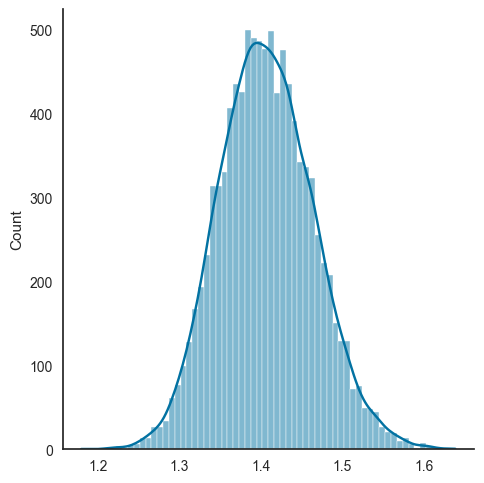

In [469]:
# Розподіл середнього значення ROAS 90-го дня.
sns.displot(bootstrap_ci1.bootstrap_distribution, kde=True)

In [421]:
df_fp.to_csv('C:\\Users\\ASUS-X515EP\\Desktop\\Data\\Projects\\Cohort Marketing\\first_forecast.csv')

### Кінцевий прогноз

In [412]:
df_bs = pd.DataFrame()

# Кількість минулих днів я обираю на основі динаміки прибутку кожного каналу, яка описує стан продукту наразі.
# Виключаю останні 2 неділі спостережень для каналу №0, адже інвестувань у канал не було.
df_b0 = sql_forecast(df_sql[df_sql['date_reg']<'2024-07-01'], 0, 14)
df_b1 = sql_forecast(df_sql, 1, 21)
# Значення у цього каналу дуже волатильні, але з чітким трендом
df_b3 = sql_forecast(df_sql, 3, 21)
df_b4 = sql_forecast(df_sql, 4, 14)
df_b5 = sql_forecast(df_sql, 5, 21)
# Значення у цього каналу дуже волатильні, але з плавним трендом зростання
df_b6 = sql_forecast(df_sql, 6, 35)
# Значення у цього каналу дуже волатильні, але з чітким трендом зростання
df_b7 = sql_forecast(df_sql, 7, 21)
df_b8 = sql_forecast(df_sql, 8, 14)
df_b9 = sql_forecast(df_sql, 9, 14)

# об'єднання в один датафрейм
df_bs = pd.concat([df_bs, df_b0, df_b1, df_b3, df_b4, df_b5, df_b6, df_b7, df_b8, df_b9])

# Трансформування дати
df_bs['cohort'] = pd.to_datetime(df_bs['cohort'], infer_datetime_format='YYYY-MM-DD')

# Отримую конкретні дні, в які відбувались події замість комбінації когорта + lt
df_bs['act_date'] = df_bs.apply(lambda row: row['cohort'] + pd.Timedelta(days=row['lt']), axis=1)
df_bs['act_date'] = pd.to_datetime(df_bs['act_date'], infer_datetime_format='YYYY-MM-DD')

df_bs.sample(5)

,cohort,lt,amount,is_closed_lt,coef,predicts,act_date
6502,2023-09-25,41,44.17,1,1.00,44.17,2023-11-05
1135,2023-07-28,43,62.02,1,1.00,62.02,2023-09-09
13811,2023-12-14,70,1767.92,1,0.06,1767.92,2024-02-22
9282,2023-10-26,0,877.28,1,1.00,877.28,2023-10-26
4586,2023-09-04,36,84.98,1,0.50,84.98,2023-10-10


In [414]:
# Датафрейм для розрахунку окупності інвестицій
in_df = df_bs[df_bs['cohort']>'2024-04-13'].groupby(['cohort', 'lt', 'is_closed_lt'], as_index=False).predicts.sum()

# Витрати на когори
costs_df = coh[coh['date_reg']>'2024-04-13'].groupby(['date_reg', 'id_network'], as_index=False).costs.sum().groupby('date_reg', as_index=False).costs.sum()

in_df = in_df.merge(costs_df, 
                    left_on='cohort', right_on='date_reg',
                    how='left').drop(['date_reg'], axis=1)

in_df['act_date'] = in_df.apply(lambda row: row['cohort'] + pd.Timedelta(days=row['lt']), axis=1)
in_df['act_date'] = pd.to_datetime(in_df['act_date'], infer_datetime_format='YYYY-MM-DD')

in_df.sample(5)

,cohort,lt,is_closed_lt,predicts,costs,act_date
4493,2024-06-02,34,1,1505.09,191424.19,2024-07-06
2114,2024-05-07,21,1,1699.60,189999.69,2024-05-28
577,2024-04-20,31,1,5119.33,168075.02,2024-05-21
5097,2024-06-09,1,1,9729.67,183886.92,2024-06-10
1816,2024-05-03,87,0,606.36,175003.19,2024-07-29


In [419]:
# Розрахунок окупності
df_sp = in_df.copy()

df_sp['cs_rev'] = (df_sp.sort_values(['cohort', 'lt'])
                                        .groupby(['cohort'])
                                        ['predicts'].cumsum())

# Окупність інвестицій
df_sp['ROAS'] = df_sp['cs_rev'] / df_sp['costs']
df_sp.sample(5)

,cohort,lt,is_closed_lt,predicts,costs,act_date,cs_rev,ROAS
1972,2024-05-05,61,1,793.27,177573.12,2024-07-05,147689.32,0.83
1400,2024-04-29,35,1,1299.97,167507.09,2024-06-03,137127.31,0.82
115,2024-04-15,24,1,5861.32,159923.30,2024-05-09,121078.14,0.76
710,2024-04-21,73,1,734.52,176208.94,2024-07-03,145624.71,0.83
4247,2024-05-30,61,0,1468.44,182982.61,2024-07-30,161468.74,0.88


In [466]:
# Розрахоую надійний інтервал для ROAS 90-го дня
bootstrap_ci2 = stats.bootstrap(
    data=(df_sp[df_sp['lt']==90].ROAS, ),
    statistic=np.mean)
ci2 = bootstrap_ci2.confidence_interval
print(f'Прибутковість 90-го дня може коливатись з 95% впевненістю в межах від  {ci2[0]*100:.2f}% до {ci2[1]*100:.2f}% з похибкою {bootstrap_ci2.standard_error:.3f}%.')

Прибутковість 90-го дня може коливатись з 95% впевненістю в межах від  169.11% до 210.87% з похибкою 0.105%.


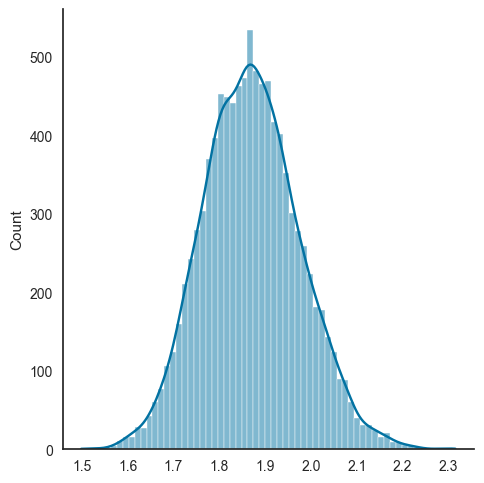

In [468]:
# Розподіл середнього значення ROAS 90-го дня.
sns.displot(bootstrap_ci2.bootstrap_distribution, kde=True)

In [429]:
print(f"У наступні 90 дні буде зароблено: {in_df[in_df['is_closed_lt']==0].predicts.sum():.0f} у.о.")

У наступні 90 дні буде зароблено: 15832014 у.о.


In [470]:
in_df[in_df['is_closed_lt']==0].predicts.sum() - incomplete_df[incomplete_df['is_closed_lt']==0].predicts.sum()


4816004.9296214245

In [422]:
df_sp.to_csv('C:\\Users\\ASUS-X515EP\\Desktop\\Data\\Projects\\Cohort Marketing\\second_forecast.csv')

### Чи статистично значуща різниця між прогнозами?

In [478]:
first_array = df_fp[df_fp['lt']==90].ROAS
second_array = df_sp[df_sp['lt']==90].ROAS

stat, p_value1 = stats.shapiro(first_array)
print(f'Ймовірність того, що дані базового датафрейму розподілені нормально складає: {p_value1}')

stat, p_value2 = stats.shapiro(second_array)
print(f'Ймовірність того, що дані зміненого датафрейму розподілені нормально складає: {p_value2}')

# Дані розподілені ненормально, але дані незалежні (тому що прибутковість розраховується на незалежнмх між собою когортами) 
# - тому для перевірки стат. значущості використаю непараметричний U-test.

Ймовірність того, що дані базового датафрейму розподілені нормально складає: 1.2092407359887147e-06
Ймовірність того, що дані зміненого датафрейму розподілені нормально складає: 3.259646774722569e-09


In [480]:
stat_df = pd.DataFrame({
    'first_forecast': first_array,
    'second_forecast': second_array
})
stat_df.head()

,first_forecast,second_forecast
90,1.29,1.51
181,1.11,1.35
272,1.30,1.95
363,0.85,1.02
454,0.95,1.17


In [493]:
mwu_test = pingouin.mwu(
    x=stat_df['second_forecast'],
    y=stat_df['first_forecast'],
    alternative='greater')
print(f'Ймовірність того, що різниця статистично значуща, \n за умови правильності нульової гіпотези про відсутність різниці, складає:  {mwu_test["p-val"][0]}')
# Виходить, що наша різниця статистично значуща.

Ймовірність того, що різниця статистично значуща, 
 за умови правильності нульової гіпотези про відсутність різниці, складає:  9.823445540521969e-05
